# Shaping regularization in geophysical estimation problems

### Sergey Fomel
### published in Geophysics, 72, R29-R36, (2007)

  Regularization is a required component of geophysical estimation
  problems that operate with insufficient data. The goal of
  regularization is to impose additional constraints on the estimated
  model. I introduce shaping regularization, a general method for
  imposing constraints by explicit mapping of the estimated model to
  the space of admissible models. Shaping regularization is integrated
  in a conjugate-gradient algorithm for iterative least-squares
  estimation. It provides the advantage of a better control on the
  estimated model in comparison with traditional regularization
  methods and, in some cases, leads to a faster iterative
  convergence. Simple data interpolation and seismic velocity
  estimation examples illustrate the concept

## Introduction

A great number of geophysical estimation problems are mathematically
ill-posed because they operate with insufficient data (Jackson, 1972). Regularization is a technique for making the estimation problems well-posed by adding indirect constraints on the estimated model (Engl et al., 1996; Zhdanov, 2002). Developed originally by Tikhonov (1963)
and others, the method of regularization has become an indispensable
part of the inverse problem theory and has found many applications in
geophysical problems: traveltime tomography (Bube and Langan, 1999; Clapp et al., 2004), migration velocity analysis (Woodward et al., 1998; Zhou et al., 2003), high-resolution Radon transform (Trad et al., 2003), spectral decomposition (Portniaguine and Castagna, 2004), etc.

While the main goal of inversion is to fit the observed data, Tikhonov’s
regularization adds another goal of fitting the estimated model to a
priorly assumed behavior. The contradiction between the two goals often
leads to a slow convergence of iterative estimation algorithms (Harlan, 1995). The speed can be improved considerably by an appropriate model
reparameterization or preconditioning (Fomel and Claerbout, 2003). However, the difficult situation of trying to satisfy two contradictory goals simultaneously leads sometimes to an undesirable behavior of the solution at the early iterations of an iterative optimization scheme.

In this paper, I introduce *shaping regularization*, a new general
method of imposing regularization constraints. A shaping operator
provides an explicit mapping of the model to the space of acceptable
models. The operator is embedded in an iterative optimization scheme
(the conjugate-gradient algorithm) and allows for a better control on
the estimation result. Shaping into the space of smooth functions can be
accomplished with efficient lowpass filtering. Depending on the
desirable result, it is also possible to shape the model into a
piecewise-smooth function, a function following geological structure, or
a function representable in a predefined basis. I illustrate the shaping
concept with simple numerical experiments of data interpolation and
seismic velocity estimation.

## Review of Tikhonov’s regularization

If the data are represented by vector $\mathbf{d}$, model parameters by
vector $\mathbf{m}$, and their functional relationship is defined by the
forward modeling operator $\mathbf{L}$, the least-squares optimization
approach amounts to minimizing the least-squares norm of the residual
difference $\mathbf{L\,m - d}$. In Tikhonov’s regularization approach,
one additionally attempts to minimize the norm of $\mathbf{D\,m}$, where
$\mathbf{D}$ is the *regularization* operator. Thus, we are looking for
the model $\mathbf{m}$ that minimizes the least-squares norm of the
compound vector
$\left[\begin{array}{cc} \mathbf{L m - d} & \epsilon \mathbf{D m}
  \end{array}\right]^T$, where $\epsilon$ is a scalar scaling parameter.
The formal solution has the well-known form 
\begin{equation}
\widehat{\mathbf{m}} = 
  \left(\mathbf{L}^T\,\mathbf{L} +
\epsilon^2\,\mathbf{D}^T\,\mathbf{D}\right)^{-1}\,\mathbf{L}^T\,\mathbf{d}\;,
\label{eqn:minv1}
\end{equation}  
where $\widehat{\mathbf{m}}$ denotes the
least-squares estimate of $\mathbf{m}$, and $\mathbf{L}^T$ denotes the
adjoint operator. One can carry out the optimization iteratively with
the help of the conjugate-gradient method (Hestenes and Steifel, 1952) or its analogs. Iterative methods have computational advantages in large-scale problems when forward and adjoint operators are represented by sparse matrices and can be computed efficiently (Saad, 2003; van der Vorst, 2003).

In an alternative approach, one obtains the regularized estimate by
minimizing the least-squares norm of the compound vector
$\left[\begin{array}{cc} \mathbf{p} & \mathbf{r} \end{array}\right]^T$
under the constraint 
\begin{equation}
\epsilon \mathbf{r = d - L m = d - L P p}\;.
\label{eqn:r}
\end{equation}
Here $\mathbf{P}$ is the *model reparameterization*
operator that translates vector $\mathbf{p}$ into the model vector
$\mathbf{m}$, $\mathbf{r}$ is the scaled residual vector, and $\epsilon$
has the same meaning as before. The formal solution of the
preconditioned problem is given by 
\begin{equation}
\widehat{\mathbf{m}} = 
  \mathbf{P}\,\widehat{\mathbf{p}} =
  \mathbf{P}\,\mathbf{P}^T\,\mathbf{L}^T\,\left(
    \mathbf{L}\,\mathbf{P}\,\mathbf{P}^T\,\mathbf{L}^T +
    \epsilon^2\,\mathbf{I}\right)^{-1}\, \mathbf{d}\;,
  \label{eqn:dinv1}
\end{equation}
where $\mathbf{I}$ is the identity operator in the
data space.
Estimate <a href="#eqn:dinv1" data-reference-type="ref" data-reference="eqn:dinv1">3</a>
is mathematically equivalent to
estimate <a href="#eqn:minv1" data-reference-type="ref" data-reference="eqn:minv1">1</a>
if $\mathbf{D}^T\,\mathbf{D}$ is invertible and 
\begin{equation}
\label{eq:equiv}
 \left(\mathbf{D}^T\,\mathbf{D}\right)^{-1} = 
 \mathbf{P}\,\mathbf{P}^T  = \mathbf{C}\;.
\end{equation}
Statistical theory of
least-squares estimation connects $\mathbf{C}$ with the model covariance
operator (Tarantola, 2004). In a more general case of reparameterization, the size of $\mathbf{p}$ may be different from the size of $\mathbf{m}$, and $\mathbf{C}$ may not have the full rank. In iterative methods, the
preconditioned formulation often leads to faster convergence. Fomel and
Claerbout (2003) suggest constructing preconditioning operators in multi-dimensional problems by recursive helical filtering.

## Smoothing by regularization

Let us consider an application of Tikhonov’s regularization to one of
the simplest possible estimation problems: smoothing. The task of
smoothing is to find a model $\mathbf{m}$ that fits the observed data
$\mathbf{d}$ but is in a certain sense smoother. In this case, the
forward operator $\mathbf{L}$ is simply the identity operator, and the
formal
solutions <a href="#eqn:minv1" data-reference-type="ref" data-reference="eqn:minv1">1</a>
and <a href="#eqn:dinv1" data-reference-type="ref" data-reference="eqn:dinv1">3</a>
take the form 
\begin{equation}
\widehat{\mathbf{m}} = 
  \left(\mathbf{I} +
    \epsilon^2\,\mathbf{D}^T\,\mathbf{D}\right)^{-1}\,\mathbf{d} =
  \mathbf{C}\,\left(\mathbf{C} +
    \epsilon^2\,\mathbf{I}\right)^{-1}\,\mathbf{d}\;.
  \label{eqn:msmoo}
\end{equation}
Smoothness is controlled by the choice of the
regularization operator $\mathbf{D}$ and the scaling
parameter $\epsilon$.

Figure <a href="#fig:exp" data-reference-type="ref" data-reference="fig:exp">1</a>
shows the impulse response of the regularized smoothing operator in the
1-D case when $\mathbf{D}$ is the first difference operator. The impulse
response has exponentially decaying tails. Repeated application of
smoothing in this case is equivalent to applying an implicit Euler
finite-difference scheme to the solution of the diffusion equation
\begin{equation}
{\frac{\partial \mathbf{m}}{\partial t}} = 
  -\mathbf{D}^T\,\mathbf{D}\,\mathbf{m}
  \label{eq:diff}
\end{equation}
The impulse response converges to a Gaussian
bell-shape curve in the physical domain, while its spectrum converges to
a Gaussian in the frequency domain.

In [3]:
from m8r import view

In [1]:
%%file exp.scons

Flow('spike', None, 'spike n1=41 k1=21 d1=1 label1=" " ')

exps = []
tris = []
repeat = 5

for iter in range(1, repeat+1):
    exp = 'exp%d' % iter
    tri = 'tri%d' % iter
    exps.append(exp)
    tris.append(tri)
    Flow(tri, 'spike', 'smooth    rect1=5 repeat=%d' % iter)
    Flow(exp, 'spike', 'smoothreg eps=5   repeat=%d' % iter)

def dots(n=repeat):
    return '''
    cat axis=2 ${SOURCES[1:%d]} |
    dots dots=0 yreverse=y label1=Time unit1=sample gaineach=n
    labels=%s
    ''' % (n, ':'.join([str(x) for x in range(1, n+1)]))

def sdots(n=repeat):
    return '''
    cat axis=2 ${SOURCES[1:%d]} | spectra > one.rsf &&
    window f1=1 < one.rsf | reverse which=1 opt=n | cat axis=1 one.rsf |
    dots dots=0 yreverse=y label1=Frequency unit1=cycle gaineach=n
    labels=%s
    ''' % (n, ':'.join([str(x) for x in range(1, n+1)]))

def graph(title):
    return '''
    cat axis=2 ${SOURCES[1:%d]} | spectra |
    graph title="%s" label1="Frequency (cycles)"
    labelsz=10 titlesz=12
    ''' % (repeat, title)

Plot('exp', exps, dots())
Plot('tri', tris, dots())

Plot('exp1', exps, sdots())
Plot('tri1', tris, sdots())

for case in ['exp', 'tri']:
    Result(case, [case, case+'1'], 'SideBySideAniso')

Writing exp.scons


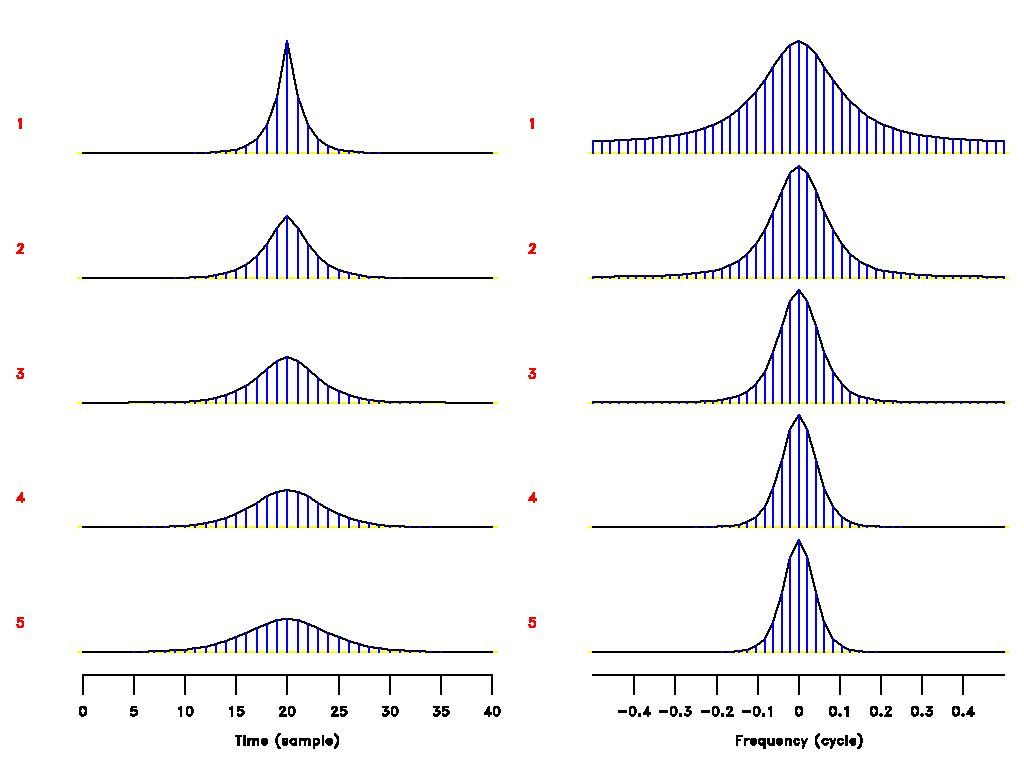

In [5]:
view('exp')

<p id="fig:exp" style="color:navy">Figure 1: Left: impulse response of regularized smoothing. Repeated smoothing converges to a Gaussian bell shape. Right: frequency spectrum of regularized smoothing. The spectrum also converges to a Gaussian.</p>

As far as the smoothing problem is concerned, there are better ways to
smooth signals than applying
equation <a href="#eqn:msmoo" data-reference-type="ref" data-reference="eqn:msmoo">5</a>.
One example is triangle smoothing (Claerbout, 1992). To define triangle smoothing of one-dimensional signals, start with box smoothing, which, in the $Z$-transform notation, is a convolution with the filter
\begin{equation}
\label{eq:zbox}
  B_k(Z) = \frac{1}{k}\,\left(1 + Z + Z^2 + \cdots +  Z^k\right) = 
  \frac{1}{k}\,\frac{1-Z^{k+1}}{1-Z}\;,
\end{equation}
where $k$ is the filter
length. Form a triangle smoother by correlation of two boxes
\begin{equation}
\label{eq:ztri}
  T_k(Z) = B_k(1/Z)\,B_k(Z)
\end{equation}  
Triangle smoothing is more efficient than regularized smoothing, because it requires twice less floating point multiplications. It also provides smoother results while having a compactly supported impulse response
(Figure <a href="#fig:tri" data-reference-type="ref" data-reference="fig:tri">2</a>).
Repeated application of triangle smoothing also makes the impulse
response converge to a Gaussian shape but at a significantly faster
rate. One can also implement smoothing by Gaussian filtering in the
frequency domain or by applying other types of bandpass filters.

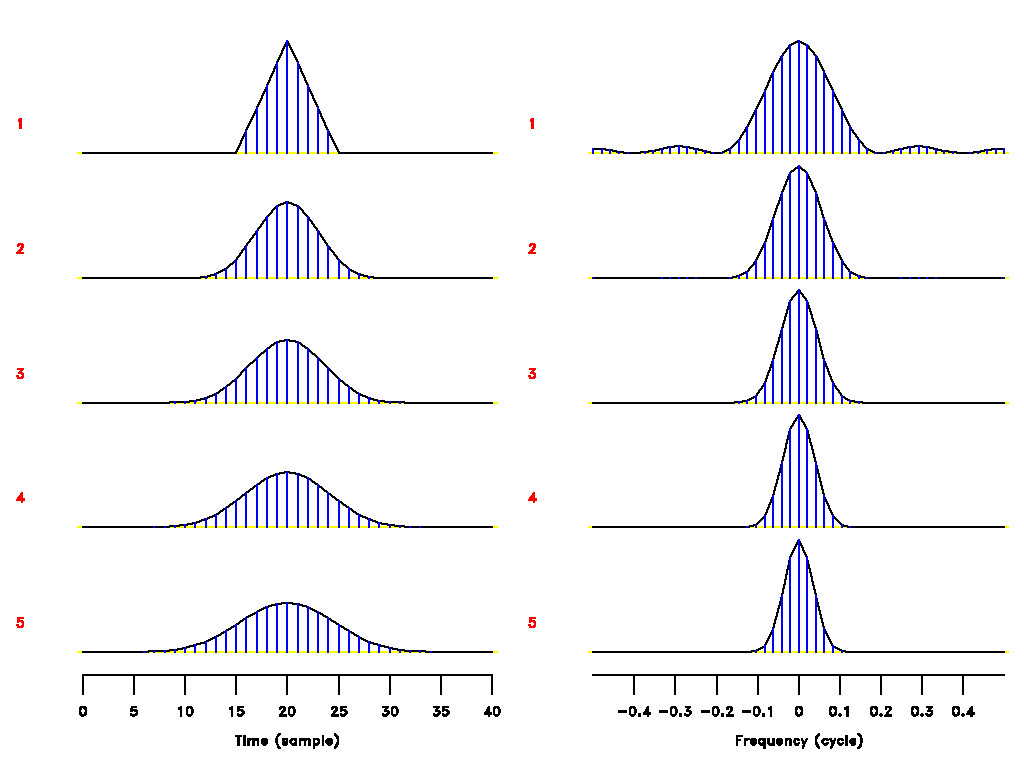

In [6]:
view('tri')

<p id="fig:tri" style="color:navy">Figure 2: Left: impulse response of triangle smoothing. Repeated smoothing converges to a Gaussian bell shape. Right: frequency spectrum of triangle smoothing. Convergence to a Gaussian is faster than in the case of regularized smoothing. Compare to Figure 1.</p>

## Shaping regularization in theory

The idea of shaping regularization starts with recognizing smoothing as
a fundamental operation. In a more general sense, smoothing implies
mapping of the input model to the space of admissible functions. I call
the mapping operator *shaping*. Shaping operators do not necessarily
smooth the input but they translate it into an acceptable model.

Taking
equation <a href="#eqn:msmoo" data-reference-type="ref" data-reference="eqn:msmoo">5</a>
and using it as the definition of the regularization operator
$\mathbf{D}$, we can write 
\begin{equation}
\label{eq:r2s}
  \mathbf{S} = \left(\mathbf{I} +
    \epsilon^2\,\mathbf{D}^T\,\mathbf{D}\right)^{-1}
\end{equation}
or
\begin{equation}
\label{eq:r2s2}
  \epsilon^2\,\mathbf{D}^T\,\mathbf{D} = \mathbf{S}^{-1} - \mathbf{I}\;.
\end{equation}
Substituting
equation <a href="#eq:r2s2" data-reference-type="ref" data-reference="eq:r2s2">10</a>
into <a href="#eqn:minv1" data-reference-type="ref" data-reference="eqn:minv1">1</a>
yields a formal solution of the estimation problem regularized by
shaping: 
\begin{equation}
\widehat{\mathbf{m}} = 
  \left(\mathbf{L}^T\,\mathbf{L} + \mathbf{S}^{-1} -
    \mathbf{I}\right)^{-1}\,\mathbf{L}^T\,\mathbf{d}
  = \left[\mathbf{I} + 
    \mathbf{S}\,\left(\mathbf{L}^T\,\mathbf{L} - \mathbf{I}\right)\right]^{-1}\,
  \mathbf{S}\,\mathbf{L}^T\,\mathbf{d}\;.
  \label{eqn:shape}
\end{equation}

The meaning of
equation <a href="#eqn:shape" data-reference-type="ref" data-reference="eqn:shape">11</a>
is easy to interpret in some special cases:

-   If $\mathbf{S = I}$ (no shaping applied), we obtain the solution of
    unregularized problem.

-   If $\mathbf{L}^T\,\mathbf{L} = \mathbf{I}$ ($\mathbf{L}$ is a
    unitary operator), the solution is simply
    $\mathbf{S}\,\mathbf{L}^T\,\mathbf{d}$ and does not require any
    inversion.

-   If $\mathbf{S} = \lambda\,\mathbf{I}$ (shaping by scaling), the
    solution approaches $\lambda\,\mathbf{L}^T\,\mathbf{d}$ as $\lambda$
    goes to zero.

The operator $\mathbf{L}$ may have physical units that require scaling.
Introducing scaling of $\mathbf{L}$ by $1/\lambda$ in
equation <a href="#eqn:shape" data-reference-type="ref" data-reference="eqn:shape">11</a>,
we can rewrite it as 
\begin{equation}
\widehat{\mathbf{m}} = 
 \left[\lambda^2\,\mathbf{I} + 
    \mathbf{S}\,\left(\mathbf{L}^T\,\mathbf{L} - \lambda^2\,\mathbf{I}\right)
  \right]^{-1}\,
  \mathbf{S}\,\mathbf{L}^T\,\mathbf{d}\;.
  \label{eqn:shape2}
\end{equation}
The $\lambda$ scaling in
equation <a href="#eqn:shape2" data-reference-type="ref" data-reference="eqn:shape2">12</a>
controls the relative scaling of the forward operator $\mathbf{L}$ but
not the shape of the estimated model, which is controlled by the shaping
operator $\mathbf{S}$.

Iterative inversion with the conjugate-gradient algorithm requires
symmetric positive definite operators (Hestenes and Steifel, 1952). The inverse operator in
equation <a href="#eqn:shape2" data-reference-type="ref" data-reference="eqn:shape2">12</a>
can be symmetrized when the shaping operator is symmetric and
representable in the form $\mathbf S
= \mathbf{H H}^T$ with a square and invertible $\mathbf{H}$. The
symmetric form of
equation <a href="#eqn:shape2" data-reference-type="ref" data-reference="eqn:shape2">12</a>
is 
\begin{equation}
\widehat{\mathbf{m}} = 
  \mathbf{H}\,\left[\lambda^2\,\mathbf{I} + 
    \mathbf{H}^T\,\left(\mathbf{L}^T\,\mathbf{L} - 
      \lambda^2\,\mathbf{I}\right)\,
    \mathbf{H}\right]^{-1}\,
  \mathbf{H}^T\,\mathbf{L}^T\,\,\mathbf{d}\;.
  \label{eqn:sym}
\end{equation}
When the inverted matrix is positive definite,
equation <a href="#eqn:sym" data-reference-type="ref" data-reference="eqn:sym">13</a>
is suitable for an iterative inversion with the conjugate-gradient
algorithm. Appendix A contains a complete algorithm description.

## From triangle smoothing to triangle shaping

The idea of triangle smoothing can be generalized to produce different
shaping operators for different applications. Let us assume that the
estimated model is organized in a sequence of records, as follows:
$\mathbf{m} = \left[\begin{array}{cccc}
    \mathbf{m}_1 &
    \mathbf{m}_2 &
    \vdots &
    \mathbf{m}_n
  \end{array}\right]^T$. Depending on the application, the records can
be samples, traces, shot profiles, etc. Let us further assume that, for
each pair of neighboring records, we can design a prediction operator
$\mathbf{Z}_{k \rightarrow k+1}$, which predicts record $k+1$ from
record $k$. A global prediction operator is then 
\begin{equation}
\label{eq:z}
  \mathbf{Z} = \left[\begin{array}{cccccc}
      0 & 0 & 0 & \cdots & 0 & 0 \\
      \mathbf{Z}_{1 \rightarrow 2} & 0 & 0 & \cdots & 0 & 0 \\
      0 & \mathbf{Z}_{2 \rightarrow 3} & 0 & \cdots & 0 & 0 \\
      0 & 0 & \mathbf{Z}_{3 \rightarrow 4} & \cdots & 0 & 0 \\
      \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
      0 & 0 & 0 & \cdots & \mathbf{Z}_{n-1 \rightarrow n} & 0 \\
    \end{array}\right]\;.
\end{equation}
The operator $\mathbf{Z}$ effectively shifts
each record to the next one. When local prediction is done with identity
operators, this operation is completely analogous to the $Z$ operator
used in the theory of digital signal processing. The $\mathbf{Z}$
operator can be squared, as follows: 
\begin{equation}
\label{eq:z2}
  \mathbf{Z}^2 = \left[\begin{array}{cccccc}
      0 & 0 & \cdots & 0 & 0 & 0 \\
      0 & 0 & \cdots & 0 & 0 & 0 \\
      \mathbf{Z}_{2 \rightarrow 3}\, \mathbf{Z}_{1 \rightarrow 2} & 0 & 
      \cdots & 0 & 0 & 0 \\
      0 & \mathbf{Z}_{3 \rightarrow 4}\, \mathbf{Z}_{2 \rightarrow 3} & 
      \cdots & 0 & 0 & 0 \\
      \cdots & \cdots & \cdots & \cdots & \cdots& \cdots \\
      0 & 0 & \cdots & 
      \mathbf{Z}_{n-1 \rightarrow n}\,\mathbf{Z}_{n-2 \rightarrow n-1} & 
      0 & 0 \\
    \end{array}\right]\;.
\end{equation}
In a shorter notation, we can denote
prediction of record $j$ from record $i$ by
$\mathbf{Z}_{i \rightarrow j}$ and write 
\begin{equation}
\label{eq:z21}
  \mathbf{Z}^2 = \left[\begin{array}{cccccc}
      0 & 0 & \cdots & 0 & 0 & 0 \\
      0 & 0 & \cdots & 0 & 0 & 0 \\
      \mathbf{Z}_{1 \rightarrow 3} & 0 & 
      \cdots & 0 & 0 & 0 \\
      0 & \mathbf{Z}_{2 \rightarrow 4} & 
      \cdots & 0 & 0 & 0 \\
      \cdots & \cdots & \cdots & \cdots & \cdots& \cdots \\
      0 & 0 & \cdots & \mathbf{Z}_{n-2 \rightarrow n} & 0 & 0 \\
    \end{array}\right]\;.
\end{equation}    
Subsequently, the prediction operator
$\mathbf{Z}$ can be taken to higher powers. This leads immediately to an
idea on how to generalize box smoothing: predict each record from the
record immediately preceding it, the record two steps away, etc. and
average all those predictions and the actual records. In mathematical
notation, a box shaper of length $k$ is then simply 
\begin{equation}
\label{eq:bk}
  \mathbf{B}_k = \frac{1}{k}\,\left(\mathbf{I} + \mathbf{Z} + 
    \mathbf{Z}^2 + \cdots +  \mathbf{Z}^k\right)\;,
\end{equation}      
which is
completely analogous to
equation <a href="#eq:zbox" data-reference-type="ref" data-reference="eq:zbox">7</a>.
Implementing
equation <a href="#eq:bk" data-reference-type="ref" data-reference="eq:bk">17</a>
directly requires many computational operations. Noting that
\begin{equation}
\label{eq:rec}
  \left(\mathbf{I} - \mathbf{Z}\right)\,\mathbf{B}_k =
    \frac{1}{k}\,\left(\mathbf{I} - \mathbf{Z}^{k+1}\right)\;,
\end{equation}      
we can
rewrite
equation <a href="#eq:bk" data-reference-type="ref" data-reference="eq:bk">17</a>
in the compact form 
\begin{equation}
\label{eq:bcomp}
  \mathbf{B}_k = 
  \frac{1}{k}\,\left(\mathbf{I} - \mathbf{Z}\right)^{-1}\,
    \left(\mathbf{I} - \mathbf{Z}^{k+1}\right)\;,
\end{equation}  
which can be
implemented economically using recursive inversion of the lower
triangular operator $\mathbf{I} - \mathbf{Z}$. Finally, combining two
generalized box smoothers creates a symmetric generalized triangle
shaper 
\begin{equation}
\label{eq:tk}
  \mathbf{T}_k = \mathbf{B}_k^T\,\mathbf{B}_k\;,
\end{equation} 
which is analogous to
equation <a href="#eq:ztri" data-reference-type="ref" data-reference="eq:ztri">8</a>.
A triangle shaper uses local predictions from both the left and the
right neighbors of a record and averages them using triangle weights.

In [7]:
%%file lomo.scons

Flow('sigmoid', None,
     '''
     sigmoid d1=.004 n1=200 d2=.008 n2=200 |
     smooth rect1=3 diff1=1 adj=y | smooth rect1=3
     ''')

order = {'sigmoid': 2,  'conflict': 1,  'dgulf': 1, 'yc27': 3}
p0 = {'sigmoid': 0,  'conflict': 0,  'dgulf': 0, 'yc27': 2}
smoo = {'sigmoid': 3,  'conflict': 1,  'dgulf': 4, 'yc27': 3}
pclip = {'sigmoid': 100, 'conflict': 100, 'dgulf': 96, 'yc27': 99.5}
rect = {'sigmoid': 3,  'conflict': 5,  'dgulf': 10, 'yc27': 3}

Plot('sigmoid', 'grey title=INPUT')
Flow('dip', 'sigmoid',
     'dip order=2 p0=0 verb=y niter=10 rect1=3 rect2=3')
Plot('dip', 'grey title=DIP scalebar=y pclip=100')

Flow('pwd', 'sigmoid dip',
     'pwd order=2 dip=${SOURCES[1]} | smooth rect1=3')
Plot('pwd', 'grey pclip=100 title=RESIDUAL')

Flow('txr', 'dip',
     '''
     noise rep=y seed=2004 |
     pwdsmooth2 dip=$SOURCE rect1=3 rect2=20 eps=0.01
     ''')
Plot('txr', 'grey title=TEXTURE')

Flow('tris', 'dip',
     '''
     spike n1=200 n2=200 d2=0.008 o2=0 nsp=9
     k1=50,100,150,50,100,150,50,100,150
     k2=50,50,50,100,100,100,150,150,150 |
     pwdsmooth2 dip=$SOURCE rect1=3 rect2=20
     ''', stdin=0)
Plot('tris', 'grey title=d allpos=y')
Plot('sigmoid2', 'sigmoid', 'grey title=a')
Plot('dip2', 'dip', 'grey title=b scalebar=y pclip=100')
Plot('txr2', 'txr', 'grey title=c')
Result('tris', 'sigmoid2 dip2 txr2 tris', 'TwoRows')

Writing lomo.scons


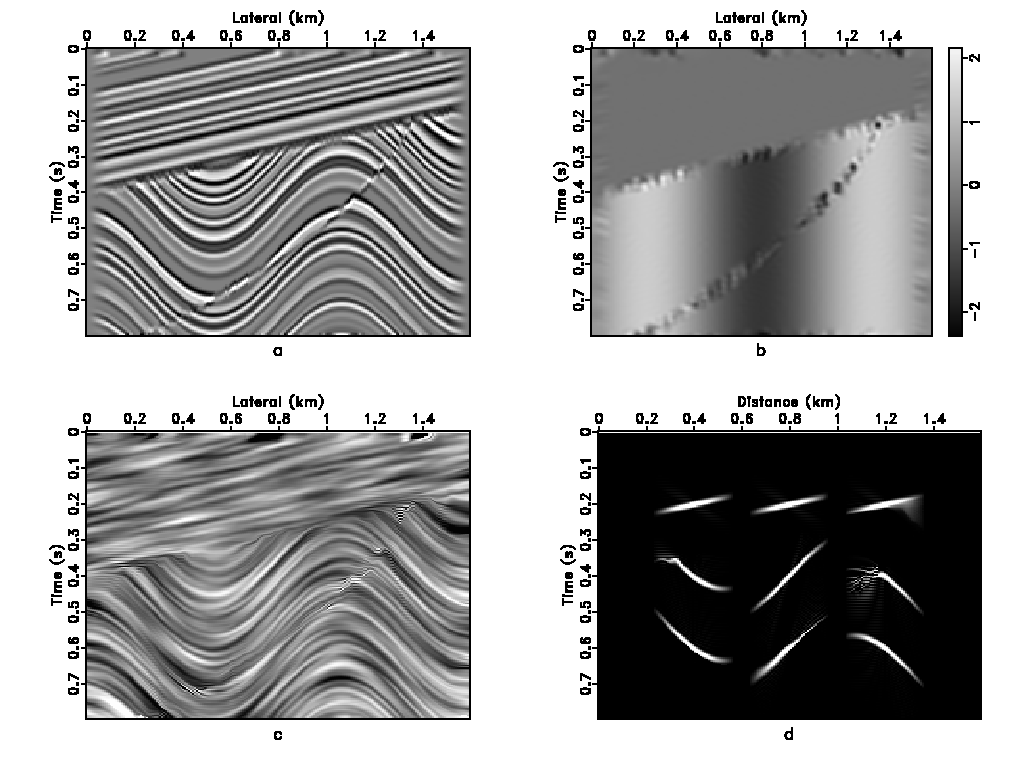

In [8]:
view('tris')

<p id="fig:tri" style="color:navy">Figure 3: Shaping by smoothing along local dip directions according to operator $\mathbf{T}_k$
from equation 20. a: an example image, b: local dip estimation, c: smoothing random numbers along local dips, d: impulse responses of oriented smoothing for nine different locations in the image space.</p>

Figure <a href="#fig:tris" data-reference-type="ref" data-reference="fig:tris">3</a>
illustrates generalized triangle shaping by constructing a
non-stationary smoothing operator that follows local structural dips.
Figure <a href="#fig:tris" data-reference-type="ref" data-reference="fig:tris">3</a>a
shows a synthetic image from Claerbout (2006).
Figure <a href="#fig:tris" data-reference-type="ref" data-reference="fig:tris">3</a>b
is a local dip estimate obtained with plane-wave destruction (Fomel, 2002).
Figure <a href="#fig:tris" data-reference-type="ref" data-reference="fig:tris">3</a>c
is the result of applying triangle smoothing oriented along local dip
directions to a field of random numbers. Oriented smoothing generates a
pattern reflecting the structural composition of the original image.
This construction resembles the method of Claerbout and Brown (1999).
Figure <a href="#fig:tris" data-reference-type="ref" data-reference="fig:tris">3</a>d
shows the impulse responses of oriented smoothing for several distinct
locations in the image space. As illustrated later in this paper,
oriented smoothing can be applied for generating geophysical Earth
models that are compliant with the local geological structure (Sinoquet, 1993; Versteeg and Symes, 1993; Clapp et al., 2004).

Appendix B describes general rules for combining elementary shaping
operators.

## Examples

Two simple examples in data regularization and seismic velocity
estimation illustrate the method of shaping.

### 1-D inverse data interpolation

I start with a simple 1-D example: a benchmark data regularization test
used previously by Fomel and Claerbout (2003).

In [10]:
%%file data.scons

Flow('time', None,
     'math n1=200 d1=1 o1=1 output="(x1-1)*0.4" ')
Flow('head', 'time', "window n1=41 | math output='exp(0.25*input)+11'")
Flow('ideal', 'time', "math output='sin(input)*0.5'")
Flow('alias', 'head', "math output='sin(input)*0.5' | put head=$SOURCE")

doty = '''
dots dots=0 connect=0 gaineach=0 constsep=1 strings=0 
clip=1.2 label1=Sample
'''

Flow('data', 'alias', 'bin1 nx=200 dx=0.4 x0=0')
Plot('data', doty + ' strings=1 d1=1 o1=1')
Plot('ideal', doty + ' connect=1')
Plot('both', 'data ideal', 'Overlay')
Result('data', 'both data', 'SideBySideAniso')

doty2 = doty + ' label1=" " '

Result('data2','data',doty2 + ' strings=1 d1=1 o1=1')

Plot('data2','data',doty2 + ' strings=1 d1=1 o1=1')
Plot('ideal2','ideal',doty2 + ' connect=1')
Result('both2','data2 ideal2','Overlay')

Overwriting data.scons


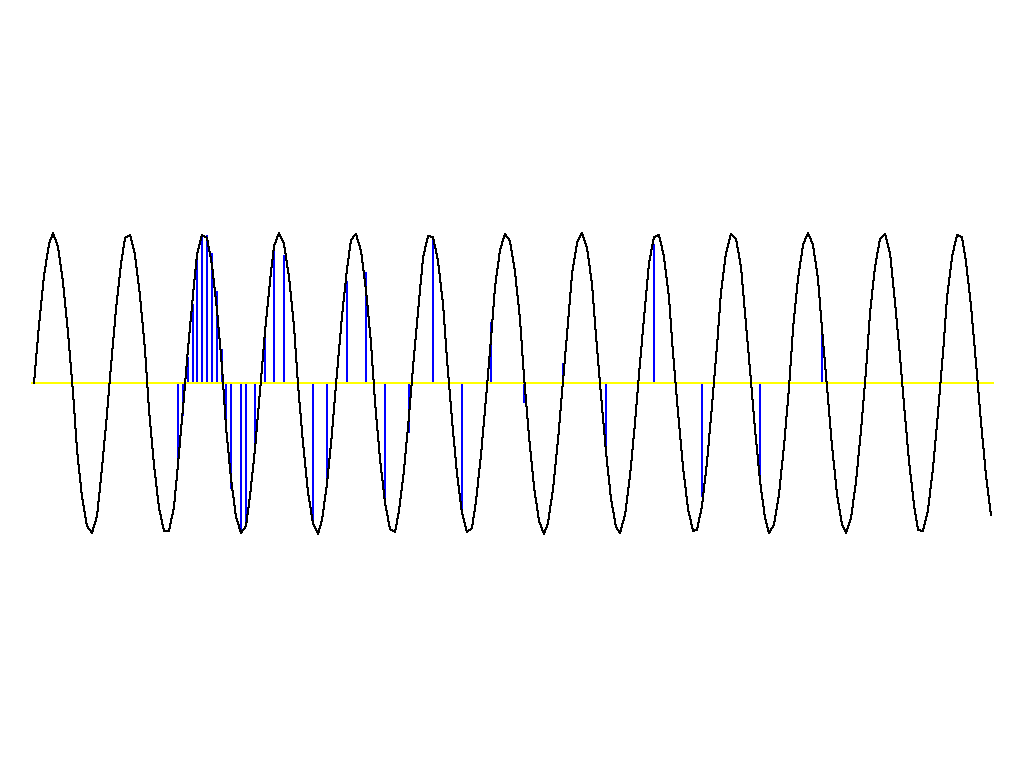

In [11]:
view('both2')

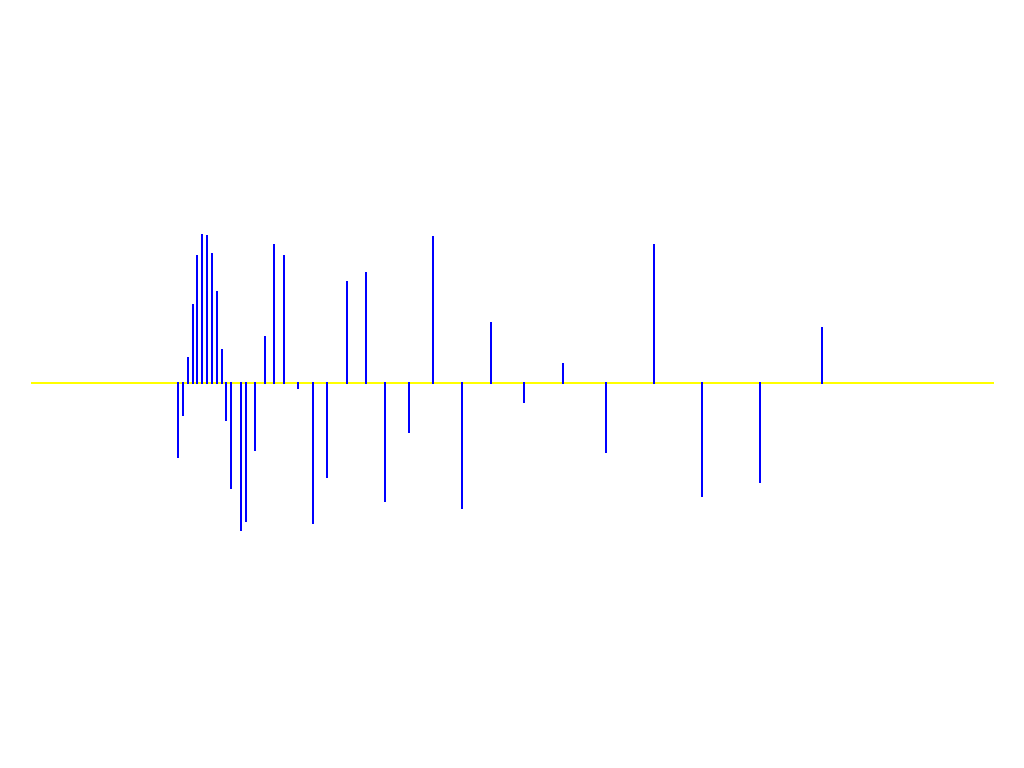

In [12]:
view('data2')

<p id="fig:both2" style="color:navy">Figure 4: The input data (b) are irregular samples from a sinusoid (a).</p>

The input synthetic data are irregular samples from a sinusoidal signal
(Figure <a href="#fig:both2,data2" data-reference-type="ref" data-reference="fig:both2,data2">4</a>).
The task of data regularization is to reconstruct the data on a regular
grid. The forward operator $\mathbf{L}$ in this case is forward
interpolation from a regular grid using linear (two-point)
interpolation.

In [13]:
%%file if.scons

doty = doty + ' yreverse=y connect=1 d1=1 o1=1'

name = 'ifsz'
title = ['Regularization', 'Preconditioning', 'Shaping 1', 'Shaping 2']
for prec in range(4):
    iters = []
    res = name[prec] + 'm'
    labels = ''
    for niter in [1, 3, 5, 7, 300]:
        iter = res + str(niter)
        iters.append(iter)
        if prec > 1:
            Flow(iter, 'alias',
                 '''
                 shapebin1 nx=200 dx=0.4 x0=0 filter=5 pef=%d gauss=1 niter=%d pad=400
                 ''' % (prec-2, niter))
        else:
            Flow(iter, 'alias',
                 'invbin1 nx=200 dx=0.4 x0=0 filter=1 prec=%d niter=%d' % (prec, niter))
        labels = labels + 'iter=%d:' % niter
    Plot(res, iters,
         '''
         cat axis=2 ${SOURCES[1:%d]} | %s connect=1 overlap=2
         title="%s" labels=%s labelsz=10 label1='Sample' 
         ''' % (len(iters), doty, title[prec], labels))
Result('if', ['im', 'fm'], 'SideBySideAniso')

Writing if.scons


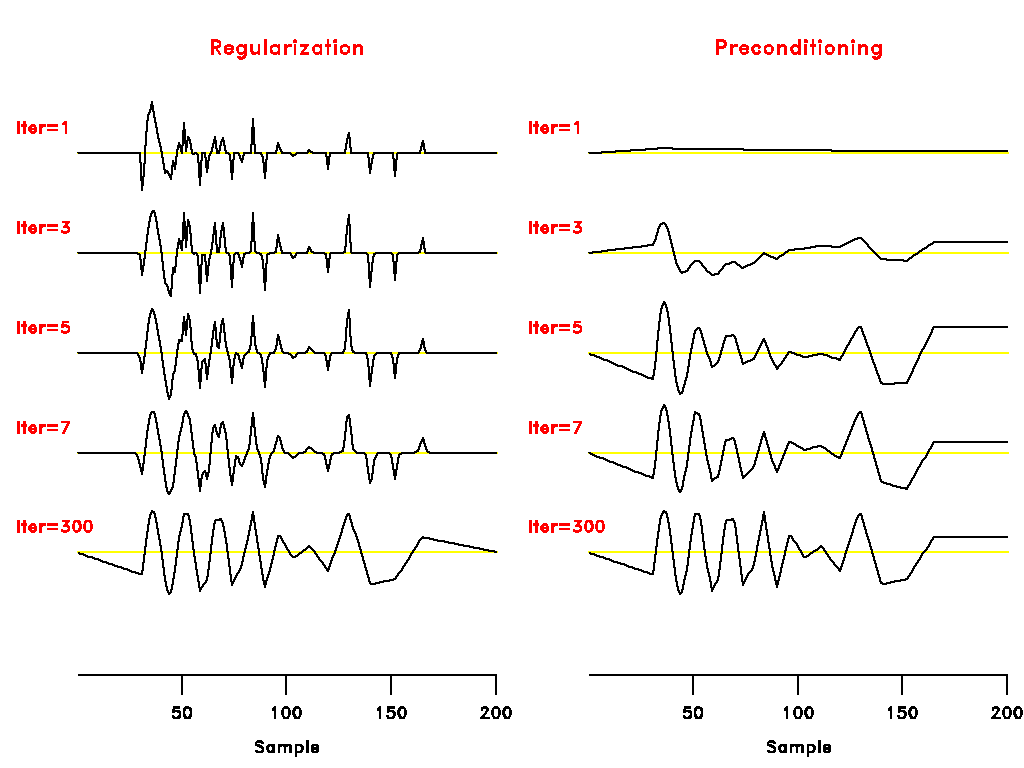

In [14]:
view('if')

<p id="fig:if" style="color:navy">Figure 5: The first iterations and the final result of inverse interpolation with Tikhonov's regularization using equation 1 (left) and with model preconditioning using equation 3 (right). The regularization operator $\mathbf{D}$ is the first finite difference. The preconditioning operator $\mathbf{P} = \mathbf{D}^{-1}$ is causal integration. The number of iterations is indicated in the plot labels.</p>

Figure <a href="#fig:if" data-reference-type="ref" data-reference="fig:if">5</a>
shows some of the first iterations and the final results of inverse
interpolation with Tikhonov’s regularization using
equation <a href="#eqn:minv1" data-reference-type="ref" data-reference="eqn:minv1">1</a>
and with model preconditioning using
equation <a href="#eqn:dinv1" data-reference-type="ref" data-reference="eqn:dinv1">3</a>.
The regularization operator $\mathbf{D}$ in
equation <a href="#eqn:minv1" data-reference-type="ref" data-reference="eqn:minv1">1</a>
is the first finite difference, and the preconditioning operator
$\mathbf{P}$
in <a href="#eqn:dinv1" data-reference-type="ref" data-reference="eqn:dinv1">3</a>
is the inverse of $\mathbf{D}$ or causal integration. The preconditioned
iteration converges faster but its very first iterations produce
unreasonable results. This type of behavior can be dangerous in real
large-scale problems, when only few iterations are affordable.

In [15]:
%%file sz.scons

Result('sz', ['sm', 'zm'], 'SideBySideAniso')

Writing sz.scons


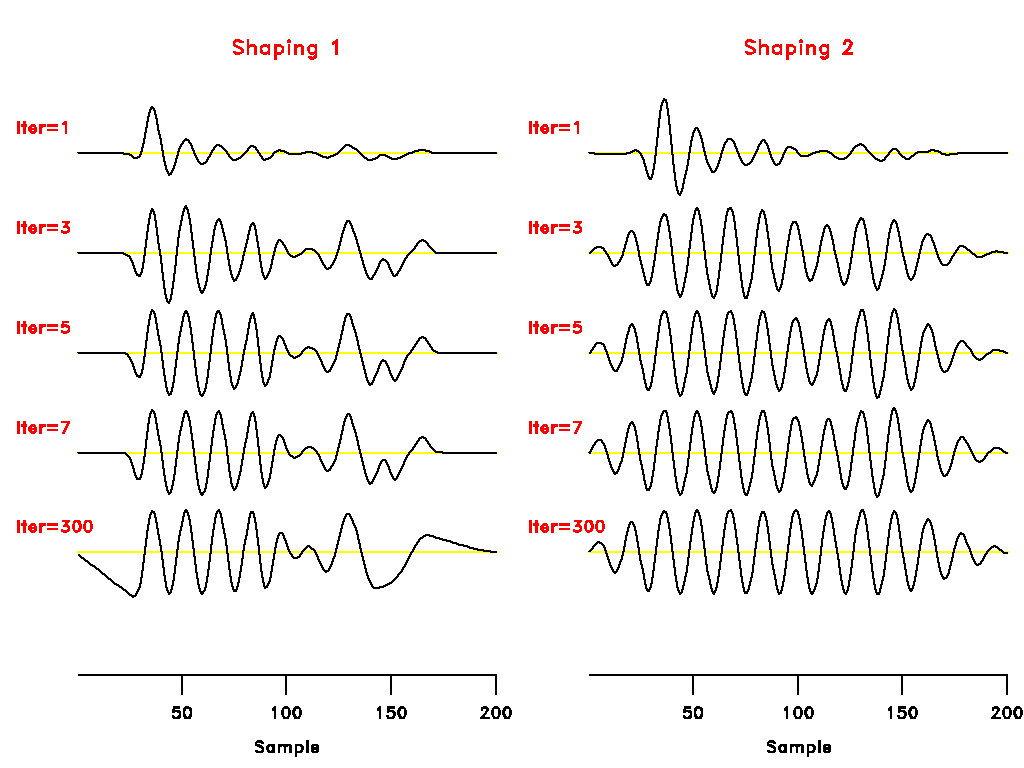

In [16]:
view('sz')

<p id="fig:sz" style="color:navy">Figure 6: The first iterations and the final result of inverse interpolation with shaping regularization using equation 13. Left: the shaping operator $\mathbf{H}$ is lowpass filtering
with a Gaussian smoother. Right: the shaping operator $\mathbf{H}$ is bandpass filtering with a shifted Gaussian. Shaping by bandpass filtering recovers the sinusoidal shape of the estimated model. The number of iterations is indicated in the plot labels.</p>

The left side of
Figure <a href="#fig:sz" data-reference-type="ref" data-reference="fig:sz">6</a>
shows some of the first iterations and the final result of inverse
interpolation with shaping regularization, where the shaping operator
$\mathbf{S}$ was chosen to be Gaussian smoothing with the impulse
response width of about 10 samples. The final result is smoother, and
the iteration is both fast-converging and producing reasonable results
at the very first iterations. Thanks to the fact that the smoothing
operation is applied at each iteration, the estimated model is
guaranteed to have the prescribed shape.

In [19]:
%%file spec.scons

import math

Flow('sm', 'sm300', 'put d1=1')
Flow('spec', 'sm', 'spectra')
Flow('spec1', 'spec', 
     'math output="exp(-%g*x1*x1)" ' % (8*math.pi*math.pi))
Flow('spec2', 'spec', 'monof ma=/dev/null | scale axis=1')

for case in (1, 2):
    spec = 'spec%d' % case
    Plot(spec, ['spec', spec],
         '''
       cat axis=2 ${SOURCES[1]} |
       graph title="Spectrum Shaping %d"
       label1="Frequency (cycle)" max1=0.3 dash=0,1
       label2="Relative Magnitude"
       ''' % case)

Result('spec', 'spec2', 'Overlay')

Overwriting spec.scons


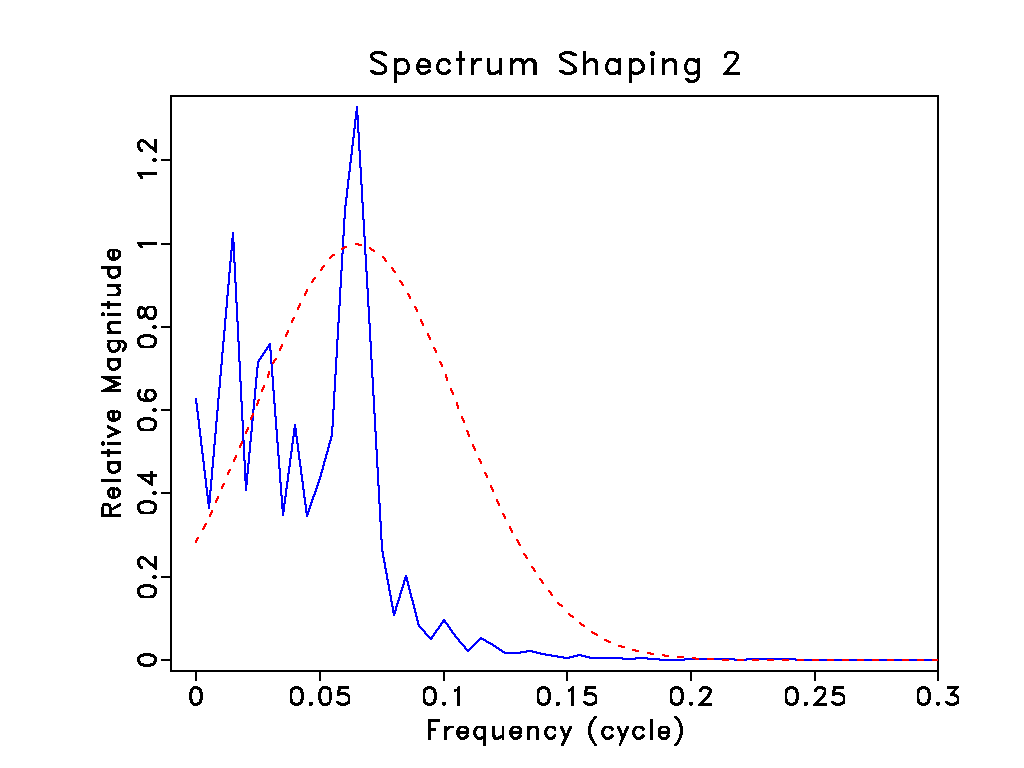

In [20]:
view('spec')

<p id="fig:spec" style="color:navy">Figure 7: Spectrum of the estimated model (solid curve) fitted to a shifted Gaussian (dashed curve). The Gaussian band-limited  filter defines a shaping operator for recovering a band-limited signal.</p>

Examining the spectrum of the final result
(Figure <a href="#fig:spec" data-reference-type="ref" data-reference="fig:spec">7</a>),
one can immediately notice the peak at the dominant frequency of the
initial sinusoid. Fitting a Gaussian shape to the peak defines a
data-adaptive shaping operator as a bandpass filter implemented in the
frequency domain (dashed curve in
Figure <a href="#fig:spec" data-reference-type="ref" data-reference="fig:spec">7</a>).
Inverse interpolation with the estimated shaping operator recovers the
original sinusoid (right side of
Figure <a href="#fig:sz" data-reference-type="ref" data-reference="fig:sz">6</a>).
Analogous ideas in the model preconditioning context were proposed by Liu and Sacchi (2001).

### Velocity estimation

The second example is an application of shaping regularization to
seismic velocity estimation.

In [23]:
%%file beivc.scons

from rsf.recipes.dix import dix
from rsf.recipes.velcon import velcon

Fetch('beinew.HH', 'midpts')
Flow('bei', 'beinew.HH', 
     'dd form=native | transp plane=23 | transp plane=34')

velcon('bei',
       nv=96,       # continuation steps
       v0=1.3,      # initial velocity
       dv=0.0125,   # velocity step
       nx=250,      # lateral dimension
       nh=48,       # number of offsets
       padt=1024,   # time padding
       padt2=2048,  # extra time padding
       #       vslope=0.67,
       #       vx0=1.5,
       padx=521,    # lateral padding
       n1=876,      # vertical extent
       v1=1.8,      # other velocity
       dx=0.0335,   # lateral sampling
       x0=7.705,    # lateral origin
       rect1=15,    # vertical smoothing
       rect2=5)     # lateral  smoothing

dix('bei',       # data name
    'bei-agc',   # migrated image
    'bei-npk',   # migration velocity
    'bei-agc2',  # semblance slice
    v0=1.3,      # minimum velocity
    vm=1.9,      # median velocity
    nx=250,      # lateral dimension
    dx=0.0335,   # midpoint sampling
    x0=7.705,    # lateral origin
    rect1=30,    # vertical smoothing
    rect2=10)    # lateral  smoothing

Overwriting beivc.scons


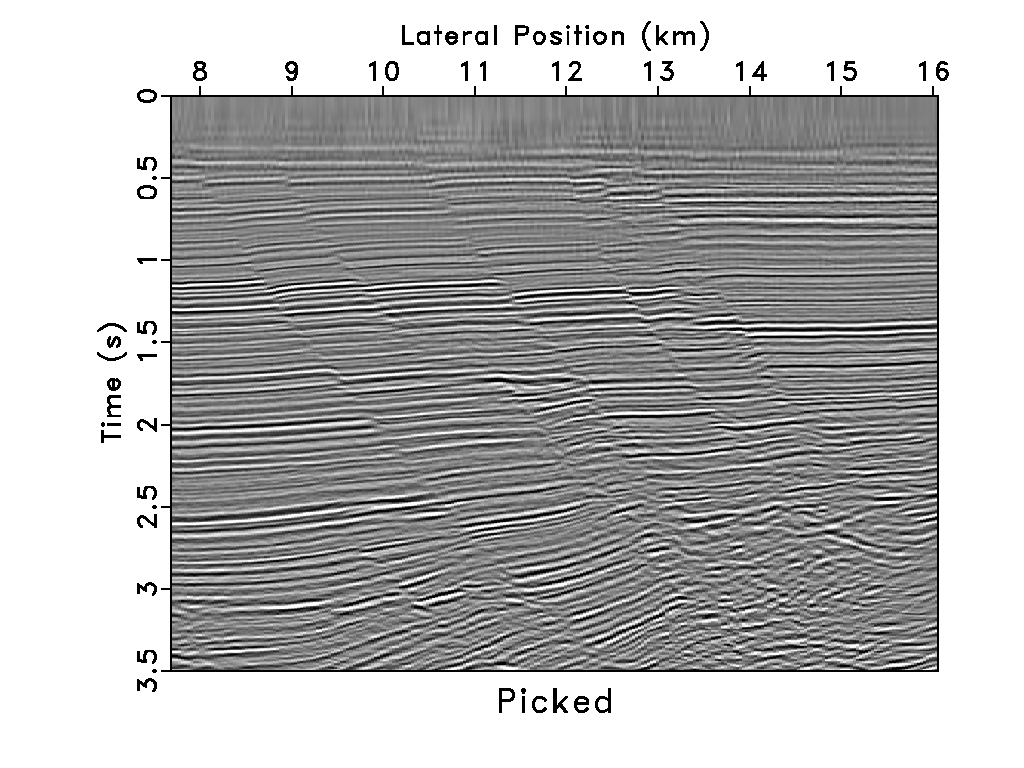

In [27]:
view('bei-agc')

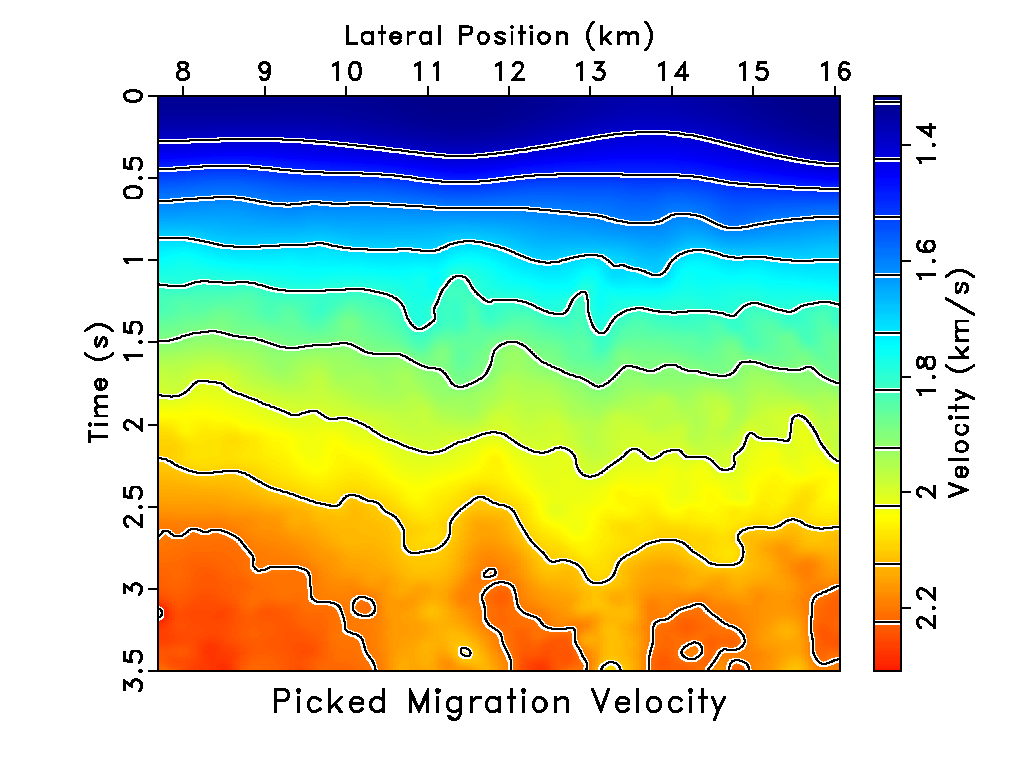

In [26]:
view('bei-npk')

<p id="fig:bei-fmg2" style="color:navy">Figure 8: Left: time-migrated image. Right: The corresponding migration velocity from automatic picking.</p>

Figure <a href="#fig:bei-fmg2" data-reference-type="ref" data-reference="fig:bei-fmg2">8</a>
shows a time-migrated image from a historic Gulf of Mexico dataset (Claerbout, 2006). The
image was obtained by velocity continuation (Fomel,
2003). The corresponding
migration velocity is shown in the right plot of
Figure <a href="#fig:bei-fmg2" data-reference-type="ref" data-reference="fig:bei-fmg2">8</a>.
Shaping regularization was used for picking a smooth velocity profile
from semblance gathers obtained in the process of velocity continuation.

The task of this example is to convert the time migration velocity to
the interval velocity. I use the simple approach of Dix inversion (Dix, 1955) formulated as a regularized inverse problem (Valenciano et al., 2004). In this case, the forward operator $\mathbf{L}$ in
equation <a href="#eqn:shape" data-reference-type="ref" data-reference="eqn:shape">11</a> is a weighted time integration. There is a choice in choosing the shaping operator $\mathbf{H}$.

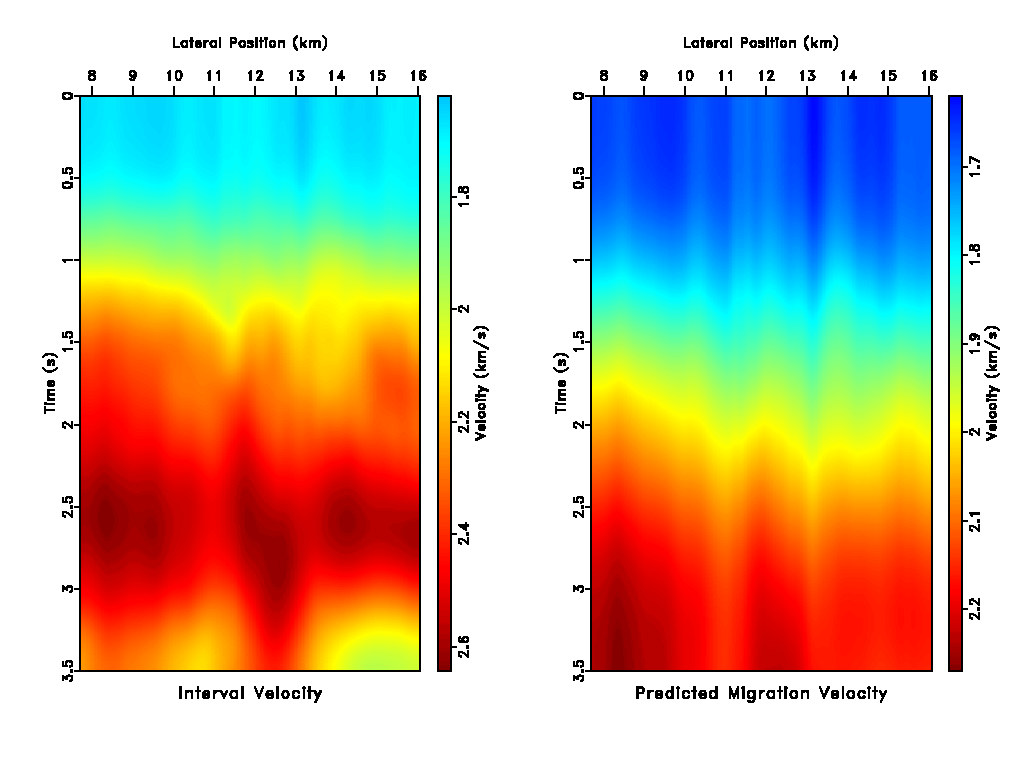

In [28]:
view('bei-dix')

<p id="fig:bei-dix" style="color:navy">Figure 9: Left: estimated interval velocity. Right: predicted migration velocity. Shaping by triangle smoothing.</p>

Figure <a href="#fig:bei-dix" data-reference-type="ref" data-reference="fig:bei-dix">9</a> shows the result of inversion with shaping by triangle smoothing. While the interval velocity model yields a good prediction of the measured velocity, it may not appear geologically plausible because the velocity structure does not follow the structure of seismic reflectors as seen in the migrated image.

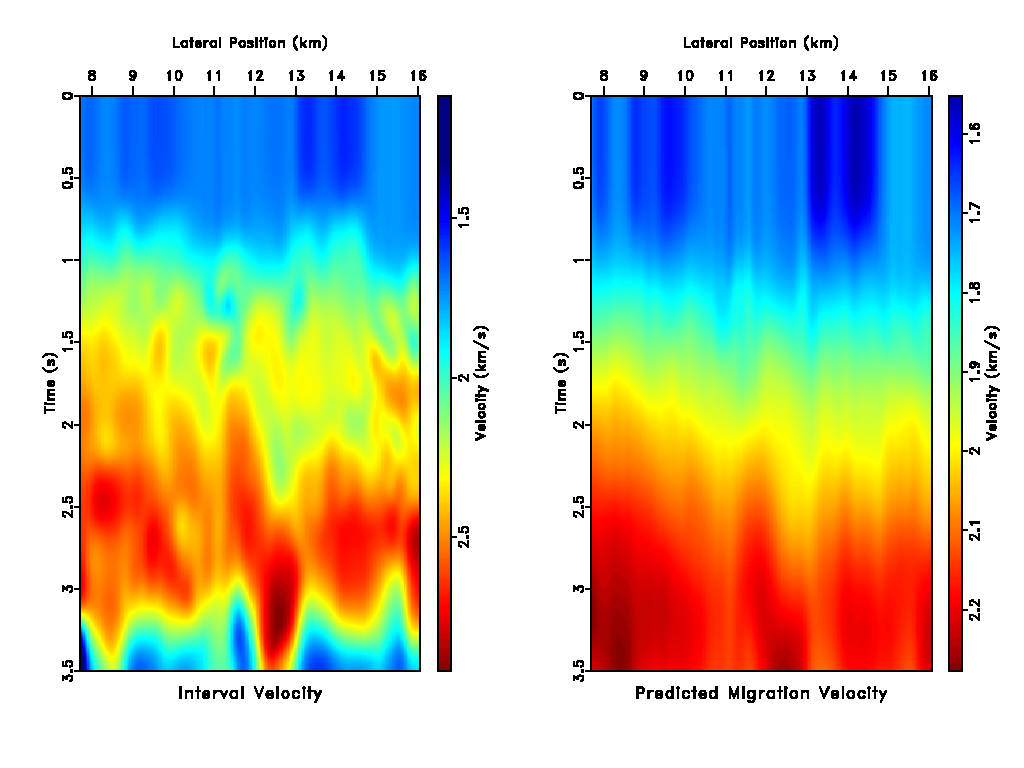

In [29]:
view('bei-shp')

<p id="fig:bei-shp" style="color:navy">Figure 10: Left: estimated interval velocity. Right: predicted migration velocity. Shaping by triangle local plane-wave smoothing creates a velocity model consistent with the reflector structure.</p>

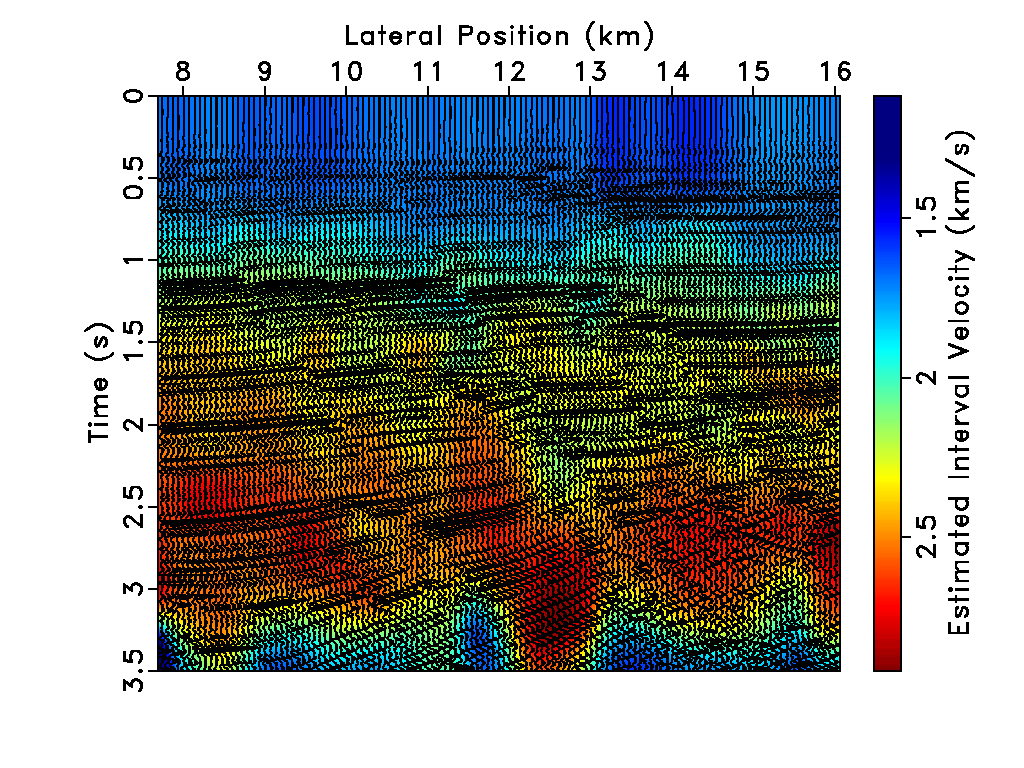

In [30]:
view('bei-shpw')

<p id="fig:bei-shpw" style="color:navy">Figure 11: Seismic image from Figure 8 overlaid on top of the interval velocity model estimated with triangle plane-wave shaping regularization.</p>

Following the ideas of steering filters (Clapp et al., 1998, 2004) and plane-wave construction (Fomel and Guitton, 2006), I
estimate local slopes in the migration image using the method of
plane-wave destruction (Fomel, 2002) and define a triangle plane-wave shaping operator $\mathbf{H}$ using the method of the previous section. The result of inversion, shown in
Figures <a href="#fig:bei-shp" data-reference-type="ref" data-reference="fig:bei-shp">10</a>
and <a href="#fig:bei-shpw" data-reference-type="ref" data-reference="fig:bei-shpw">11</a>,
makes the estimated interval velocity follow the geological structure
and thus appear more plausible for direct interpretation. Similar
results were obtained by Fomel and Guitton (2006) using model parameterization by plane-wave construction but at a higher computational cost. In the case of shaping regularization, about 25 efficient iterations were sufficient to converge to the machine precision accuracy.

## Conclusions

Shaping regularization is a new general method for imposing
regularization constraints in estimation problems. The main idea of
shaping regularization is to recognize shaping (mapping to the space of
acceptable functions) as a fundamental operation and to incorporate it
into iterative inversion.

There is an important difference between shaping regularization and
conventional (Tikhonov’s) regularization from the user prospective.
Instead of trying to find and specify an appropriate regularization
operator, the user of the shaping regularization algorithm specifies a
shaping operator, which is often easier to design. Shaping operators can
be defined following a triangle construction from local predictions or
by combining elementary shapers.

I have shown two simple illustrations of shaping applications. The
examples demonstrate a typical behavior of the method: enforced model
compliance to the specified shape at each iteration and, in many cases,
fast iterative convergence of the conjugate gradient iteration. The
model compliance behavior follows from the fact that shaping enters
directly into the iterative process and provides an explicit control on
the shape of the estimated model.

## Acknowledgments

I would like to thank Pierre Hardy and Mauricio Sacchi for inspiring
discussions, TOTAL for partially supporting this research, and three
reviewers for helpful suggestions.

## References

Bube, K., and R. Langan, 1999, On a continuation approach to
regularization for crosswell tomography: 69th Ann. Internat. Mtg, Soc.
of Expl. Geophys., 1295–1298.

Claerbout, J., and M. Brown, 1999, Two-dimensional textures and
prediction-error filters: 61st Mtg., Eur. Assn. Geosci. Eng.,
Session:1009.

Claerbout, J. F., 1992, Earth Soundings Analysis: Processing Versus
Inversion: Blackwell Scientific Publications.

——–, 2006, Basic Earth imaging: Stanford Exploration Project,
`http://sepwww.stanford.edu/sep/prof/`.

Clapp, R. G., B. Biondi, and J. F. Claerbout, 2004, Incorporating
geologic information into reflection tomography: Geophysics, **69**,
533–546.

Clapp, R. G., B. L. Biondi, S. B. Fomel, and J. F. Claerbout, 1998,
Regularizing velocity estimation using geologic dip information: 68th
Ann. Internat. Mtg, Soc. of Expl. Geophys., 1851–1854.

Dix, C. H., 1955, Seismic velocities from surface measurements:
Geophysics, **20**, 68–86.

Engl, H., M. Hanke, and A. Neubauer, 1996, Regularization of inverse
problems: Kluwer Academic Publishers.

Fomel, S., 2002, Applications of plane-wave destruction filters:
Geophysics, **67**, 1946–1960.

——–, 2003, Time-migration velocity analysis by velocity continuation:
Geophysics, **68**, 1662–1672.

Fomel, S., and J. Claerbout, 2003, Multidimensional recursive filter
preconditioning in geophysical estimation problems: Geophysics, **68**,
577–588.

Fomel, S., and A. Guitton, 2006, Regularizing seismic inverse problems
by model re-parameterization using plane-wave construction: Geophysics,
**71**, S209–S217.

Fomel, S., P. Sava, J. Rickett, and J. Claerbout, 2003, The Wilson-Burg
method of spectral factorization with application to helical filtering:
Geophysical Prospecting, **51**, 409–420.

Harlan, W. S., 1995, Regularization by model redefinition:
http://billharlan.com/pub/papers/regularization.pdf.

Hestenes, M. R., and E. Steifel, 1952, Methods of conjugate gradients
for solving linear systems: J. Res. Nat. Bur. Stand., **49**, 409–436.

Jackson, D. D., 1972, Interpretation of inaccurate, insufficient and
inconsistent data: Geophys. J. R. Astron. Soc., **28**, 97–109.

Liu, B., and M. Sacchi, 2001, Minimum weighted norm interpolation of
seismic data with adaptive weights: 71st Ann. Internat. Mtg, Soc. of
Expl. Geophys., 1921–1924.

Portniaguine, O., and J. Castagna, 2004, Inverse spectral decomposition,
*in* 74th Ann. Internat. Mtg: Soc. of Expl. Geophys., 1786–1789.

Saad, Y., 2003, Iterative methods for sparse linear systems: SIAM.

Sinoquet, D., 1993, Modeling a priori information on the velocity field
in reflection tomography: 63rd Ann. Internat. Mtg, Soc. of Expl.
Geophys., 591–594.

Tarantola, A., 2004, Inverse problem theory and methods for model
parameter estimation: SIAM.

Tikhonov, A. N., 1963, Solution of incorrectly formulated problems and
the regularization method: Sovet Math. Dokl., 1035–1038.

Trad, D., T. Ulrych, and M. Sacchi, 2003, Latest views of the sparse
Radon transform: Geophysics, **68**, 386–399.

Valenciano, A. A., M. Brown, A. Guitton, and M. D. Sacchi, 2004,
Interval velocity estimation using edge-preserving regularization, *in*
74th Ann. Internat. Mtg: Soc. of Expl. Geophys.

van der Vorst, H. A., 2003, Iterative Krylov methods for large linear
systems: Cambridge University Press.

Versteeg, R., and W. W. Symes, 1993, Geometric constraints on seismic
inversion: 63rd Ann. Internat. Mtg, Soc. of Expl. Geophys., 595–598.

Woodward, M. J., P. Farmer, D. Nichols, and S. Charles, 1998, Automated
3-D tomographic velocity analysis of residual moveout in prestack depth
migrated common image point gathers: 68th Ann. Internat. Mtg, Soc. of
Expl. Geophys., 1218–1221.

Zhdanov, M. S., 2002, Geophysical inverse theory and regularization
problems: Elsevier Science.

Zhou, H., S. Gray, J. Young, D. Pham, and Y. Zhang, 2003, Tomographic
residual curvature analysis: The process and its components: 73rd Ann.
Internat. Mtg., Soc. of Expl. Geophys., 666–669.

## APPENDIX A
## CONJUGATE-GRADIENT ALGORITHM

A complete algorithm for conjugate-gradient iterative inversion with
shaping regularization is given below. The algorithm follows directly
from combining equation <a href="#eqn:sym" data-reference-type="ref" data-reference="eqn:sym">13</a> with the classic conjugate-gradient algorithm of Hestenes and Steifel (1952).

![](https://reproducibility.org/RSF/book/tccs/shape/paper_html/img60.png) 
  
The iteration terminates after $N$ iterations or upon reaching
convergence to the specified tolerance $tol$. It uses auxiliary vectors
$\mathbf{p}$, $\mathbf{r}$, $\mathbf{s}_p$, $\mathbf{s}_m$,
$\mathbf{s}_r$, $\mathbf{g}_p$, $\mathbf{g}_m$, $\mathbf{g}_r$ and
applies operators $\mathbf{L}$, $\mathbf{H}$ and their adjoints only
once per each iteration.

## APPENDIX B
## COMBINING SHAPING OPERATORS

General rules can be developed to combine two or more shaping operators
for the cases when there are several features in the model that need to
be characterized simultaneously. A general rule for combining two
different shaping operators $\mathbf{S}_1$ and $\mathbf{S}_2$ can have
the form 
\begin{equation}
\label{eq:combine}
  \mathbf{S}_{12} =
  \mathbf{S}_{1} + \mathbf{S}_{2} -
  \mathbf{S}_{1}\,\mathbf{S}_{2}\;,
\end{equation}  
where one adds the responses of
the two shapers and then subtracts their overlap. An example is shown in
Figure <a href="#fig:test12" data-reference-type="ref" data-reference="fig:test12">B-1</a>,
where an impulse response for oriented smoothing in two different
directions is constructing from smoothing in each of the two directions
separately.

In [35]:
%%file test12.scons

trismooth = '''
smooth rect1=5 | pwspray reduce=triangle ns=10 dip=${SOURCES[1]}
'''

Flow('spike2',None,'spike n1=41 n2=41 k1=21 k2=21 d1=1 d2=1')
Flow('one', 'spike2', 'math output=1')
Flow('two', 'spike2', 'math output=-2')
Flow('spike-2', 'spike2 two', trismooth)
Flow('spike1', 'spike2 one', trismooth)
Flow('spike12', 'spike1 two', trismooth)
Flow('spike21', 'spike-2 one', trismooth)
Flow('test12', 'spike1 spike-2 spike12 spike21',
     'add ${SOURCES[1:4]} scale=1,1,-0.5,-0.5')

Result('test12',
       '''
       grey allpos=y wanttitle=n transp=n
       unit1= unit2= label1="X Sample" label2="Y Sample" screenratio=1
       ''')

Overwriting test12.scons


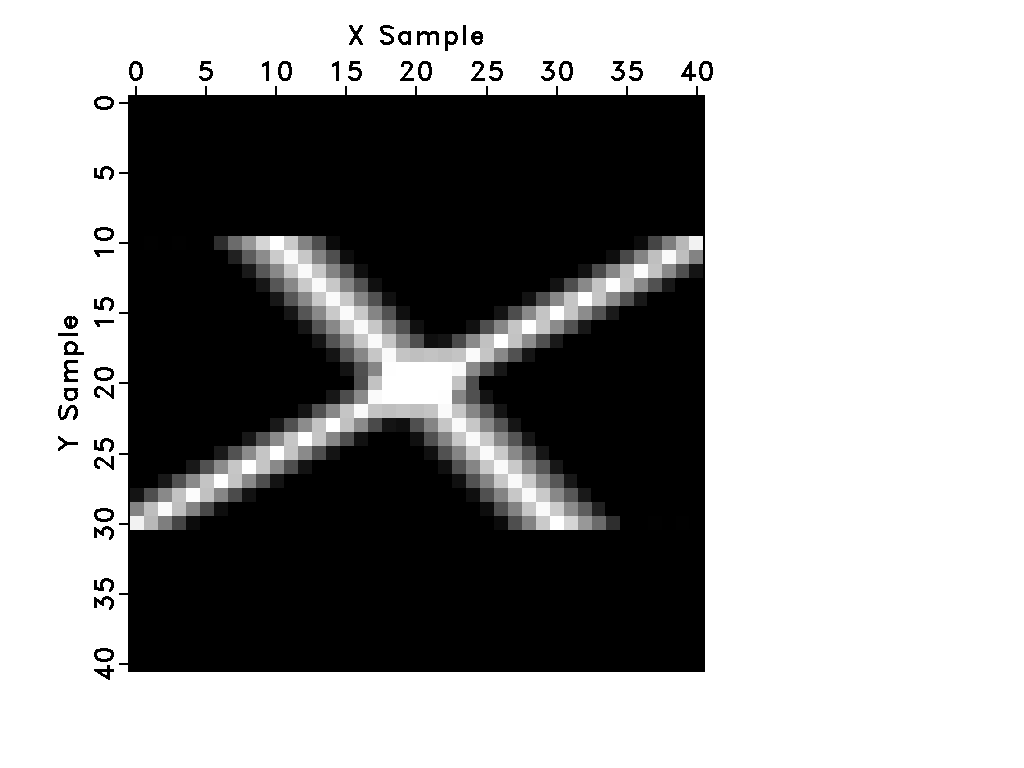

In [36]:
view('test12')

<p id="fig:test12" style="color:navy">Figure B-1: Impulse response for a combination of two shaping operators smoothing in two different directions.</p>

Combining two operators that work in orthogonal directions can be
accomplished with a simple tensor product, as follows: 
\begin{equation}
\label{eq:xy}
  \mathbf{S}_{xy} = \mathbf{S}_{x}\,\mathbf{S}_{y}\;,
\end{equation}  
where
$\mathbf{S}_{x}$ and $\mathbf{S}_{y}$ are shaping operators that apply
in orthogonal $x$- and $y$-directions, and $\mathbf{S}_{xy}$ is a
combined operator that works in both directions. An example is shown in
Figure <a href="#fig:plane" data-reference-type="ref" data-reference="fig:plane">B-2</a>, where two two-dimensional shapers working in orthogonal directions are combined to produce an impulse response of 3-D shaping operator that applies smoothing along a three-dimensional plane.

In [38]:
%%file plane.scons

Flow('spike3', None,
     '''
     spike n1=41 n2=41 n3=41 k1=21 k2=21 k3=21 d1=1 d2=1 d3=1 
     unit1= unit2= unit3=
     ''')

Flow('one3', 'spike3', 'math output=1')
Flow('two3', 'spike3', 'math output=-2')

Flow('plane', 'spike3 one3 two3',
     '''
     smooth rect1=3 |
     pwcascade rect=21 dip=${SOURCES[1]} |
     transp plane=23 |
     pwcascade rect=11 dip=${SOURCES[2]} |
     transp plane=23
     ''')

Result('plane',
       '''
       byte allpos=y gainpanel=all |
       grey3 flat=n screenratio=1 frame1=20 frame2=20 frame3=20
       point1=0.6 point2=0.6
       label1=' ' label2=' ' label3=' ' wanttitle=n
       ''')

Writing plane.scons


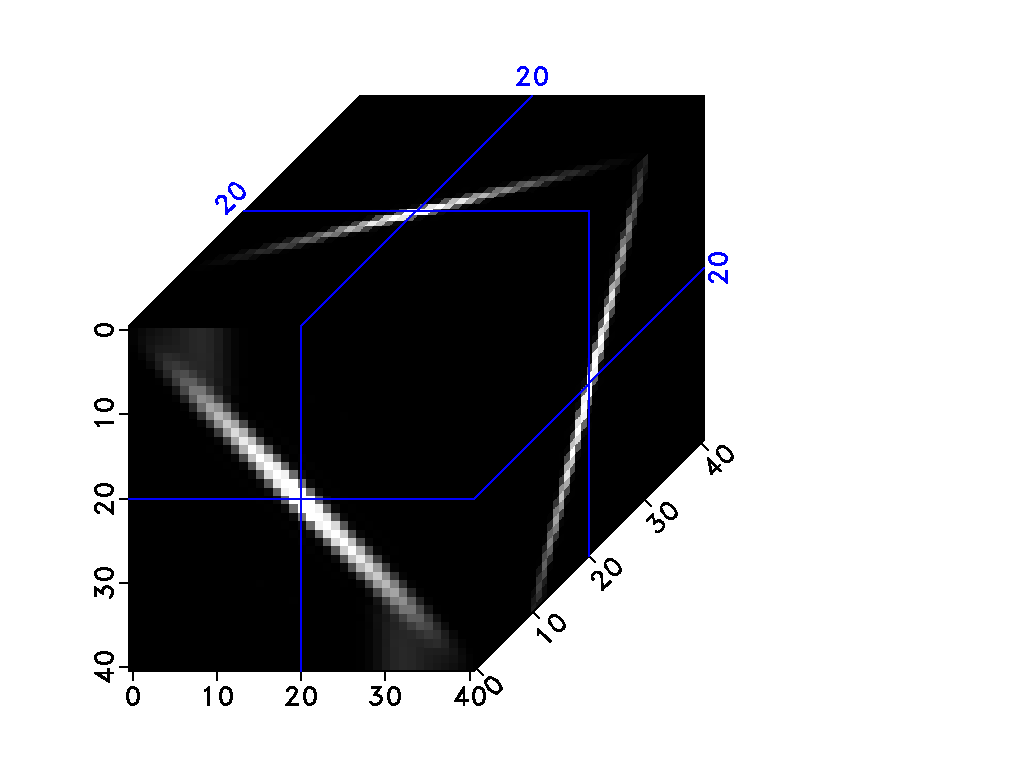

In [39]:
view('plane')

<p id="fig:plane" style="color:navy">Figure B-2: 3-D impulse response
for a combination of two 2-D shaping operators smoothing in in-line and cross-line directions.</p>

Constructing multidimensional recursive filters for helical
preconditioning (Fomel and Claerbout, 2003) is significantly more difficult. It involves helical spectral factorization, which may create long inefficient filters (Fomel et al., 2003).